<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/7_1_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망

**패션 MNIST 데이터셋**

MNIST: 딥러닝을 배울때 많이 사용하는 데이터셋

손으로 쓴 0~9까지의 숫자로 이루어짐

패션 MNIST는 숫자 대신 10종류의 패션 아이템으로 이루어진 데이터

패션 MNIST는 매우 유명하기 때문에 많은 딥러닝 라이브러리에서 이 데이터를 가져올 수 있는 도구를 제공

여기서는 텐서플로(tensorflow)를 사용해서 데이터를 불러옴

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

- keras.load_data(): 훈련/테스트 세트 나눠서 데이터를 불러옴

In [ ]:
from tensorflow import keras # 텐서플로의 패션 MNIST 데이터 다운로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


훈련세트 : 입력은 28x28픽셀 이미지 60,000개 / 타깃은 0~9의 숫자 60,000개

테스트세트 : 훈련세트와 동일한 조건의 이미지 10,000개 / 상응하는 타깃도 마찬가지

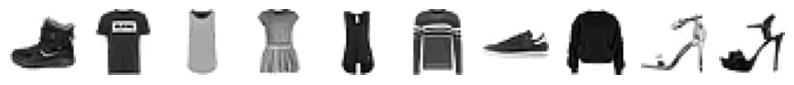

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10)) # 1행 10열로 배치, 그림 사이즈
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off') # 좌표축 제거
plt.show()

In [ ]:
print([train_target[i] for i in range(10)]) # 타깃값 확인

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


테이블당 샘플 개수 확인

In [ ]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

훈련 샘플이 많기 때문에 전체 데이터를 한번에 사용하는 것보다는 샘플을 하나씩 사용하는 것이 더 효율적으로 보임

-> **확률적 경사 하강법(SGDClassification)**를 사용


확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동

따라서 특성마다 값의 범위가 일정해야함

패션 MNIST의 경우 각 픽셀은 0~255 사이의 정수값을 가짐

이런 이미지의 경우 보통 **255로 나누어 0~1 사이의 값으로 정규화**

표준화는 아니지만 양수 값으로 이루어진 이미지를 전처리할 때 널리 사용하는 방법

정규화와 표준화의 차이점

**정규화(Normalization)**
- 값의 범위(scale)을 0~1 사이의 값으로 변환
- scikit_learn에서 MinMaxScaler사용

**표준화(Standardization)**
- 값의 범위(scale)를 평균 0, 분산 1이 되도록 변환
- 정규분포를 표준정규분포로 변환하는 것과 같음
- scikit_learn에서 StandardScaler사용

**공통점**
- 학습 전에 데이터를 scaling 함
 - 머신러닝에서 스케일(scale)이 큰 특성의 영향력이 강해지는 것을 방지
 - 딥러닝에서 Local Minima에 빠질 위험을 감소하고 학습 속도 향상

In [ ]:
# 표준화 전처리를 위해 0~255 사이의 픽셀값을 255로 나눔
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) # 샘플 1차원 배열로 변환

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
# 경사하강법을 이용해서 모델 훈련
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
# 교차검증으로 성능 확인
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


**방정식 살펴보기**

로지스틱 회귀 모델 공식

ci = x1w(1,i) + x2w(2,i) + ... + x784w(784,i) + bi

i: 클래스 수; c: 클래스; x: 픽셀; w: 가중치; b: 절편

pi = softmax(ci)

pi: 데이터가 i번째 클래스일 확률


---


softmax: 다중분류에서 사용되는 여러 개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록 만드는 함수

이진분류에서는 시그모이드 함수가 사용됨


---


총 784*10+10개의 모델 파라미터가 존재

## 인공신경망

가장 기본적인 인공신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀 함수와 비슷

1. 1차원 배열로 변경된 이미지의 784개의 픽셀은 각각 **입력층**에 입력으로 들어감. 추가 연산은 없음

2. 10개의 클래스가 있으므로, 중간 연산들을 통해 최종적으로 10개의 **출력층**으로 연산 결과값이 나옴

3. 이러한 출력을 연산하는 단위를 **뉴런**이라 하며 선형 연산이 전부임

여기서의 선형 연산은 확률적 경사 하강법처럼 입력값에 대한 가중치의 절편 연산임

뉴런을 유닛(uniting)이라고 부르기도 함


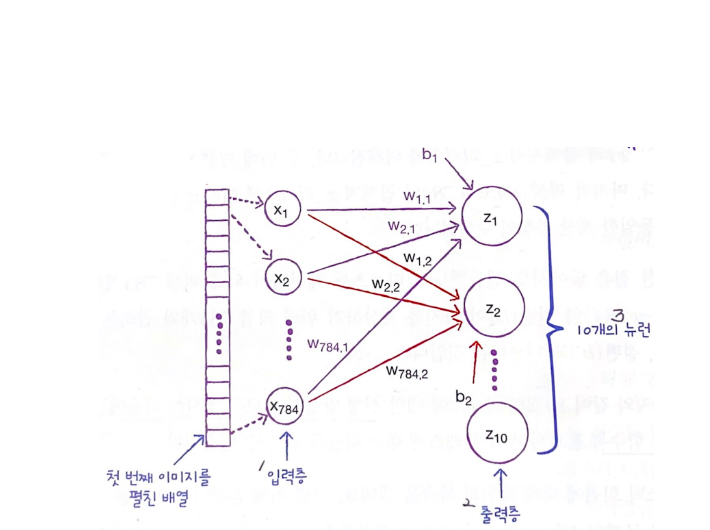

### 텐서플로와 케라스

인기있는 딥러닝 라이브러리

딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리 장치 gpu를 사용하는 것

gpu는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 덧셈과 곱셈이 많이 수행되는 인공신경망에 큰 도움이 됨

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가

인공 신경망에서는 교차 검증을 잘 사용하지 않고 **검증 세트를 별도로 덜어내서 사용**

1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸림

정규화는 이미 앞에서 했으므로 넘어감

In [ ]:
from sklearn.model_selection import train_test_split # 검증세트 수동으로 덜어냄

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape) # 20% 덜어냄

(12000, 784) (12000,)


**출력층 생성**

- 케라스의 Dense() 클래스 사용

**밀집층**

- keras.layers: 다양한 층 클래스를 담고 있는 케라스 패키지(예로 밀집층)

- activation : 각 유닛에서 출력되는 z값들을 적용할 활성화함수 지정하는 매개변수

- input_shape : 입력값의 크기를 넣는 매개변수 (튜플로 지정해야 함)

784개의 픽셀과 10개의 뉴런이 모두 연결된 선을 생각하면 7840개의 연결된 선이 존재하며 이는 매우 빽빽하게 밀집되어 보임

따라서 밀집층이라 불림

이런 층을 양쪽의 뉴런이 모두 연결하므로 완전 연결층이라고도 부름

In [ ]:
# 가장 기본인 밀집층
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 유닛 10개 / 소프트맥스 함수 / 입력 784개

keras.layers.Dense(뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기)

- 첫 번째 매개변수인 뉴런 개수는 10개의 클래스(패션 아이템)을 분류하므로 10을 저장함
- 두 번째 매개변수는 활성화 함수을 지정함
  - 뉴런의 선령 방정식 계산 결과에 적용되는 함수
  - 지정하지 않으면 뉴런의 선형 방정식 계산 결과가 출력
  - 여기서는 뉴런의 출력에 적용할 함수로 다중분류이기 때문에 소프트맥스 함수를 사용함
  - 소프트맥스 함수는 뉴런에서 출력되는 값을 확률로 바꾸기 위해 사용됨
  - 케라스 층에서는 activation 매개변수에 소프트맥스 함수를 지정함
  - 만약 2개의 클래스를 분류하는 이진 분류라면 시그모이드 함수를 사용하므로 activation='sigmoid'를 지정함
  - 회귀 모델인 경우에는 활성화 함수를 적용할 필요가 없음
- 세 번째 매개변수는 입력값의 크기. 10개의 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정
 - 784개의 원소로 이루어진 1차원 배열

**밀집층을 가진 신경망 모델 만들기**

여기서는 출력층 하나만으로 구성됨

- Sequential() : 만들어둔 층 객체로 신경망 모델을 생성해주는 클래스

In [ ]:
model = keras.Sequential(dense)

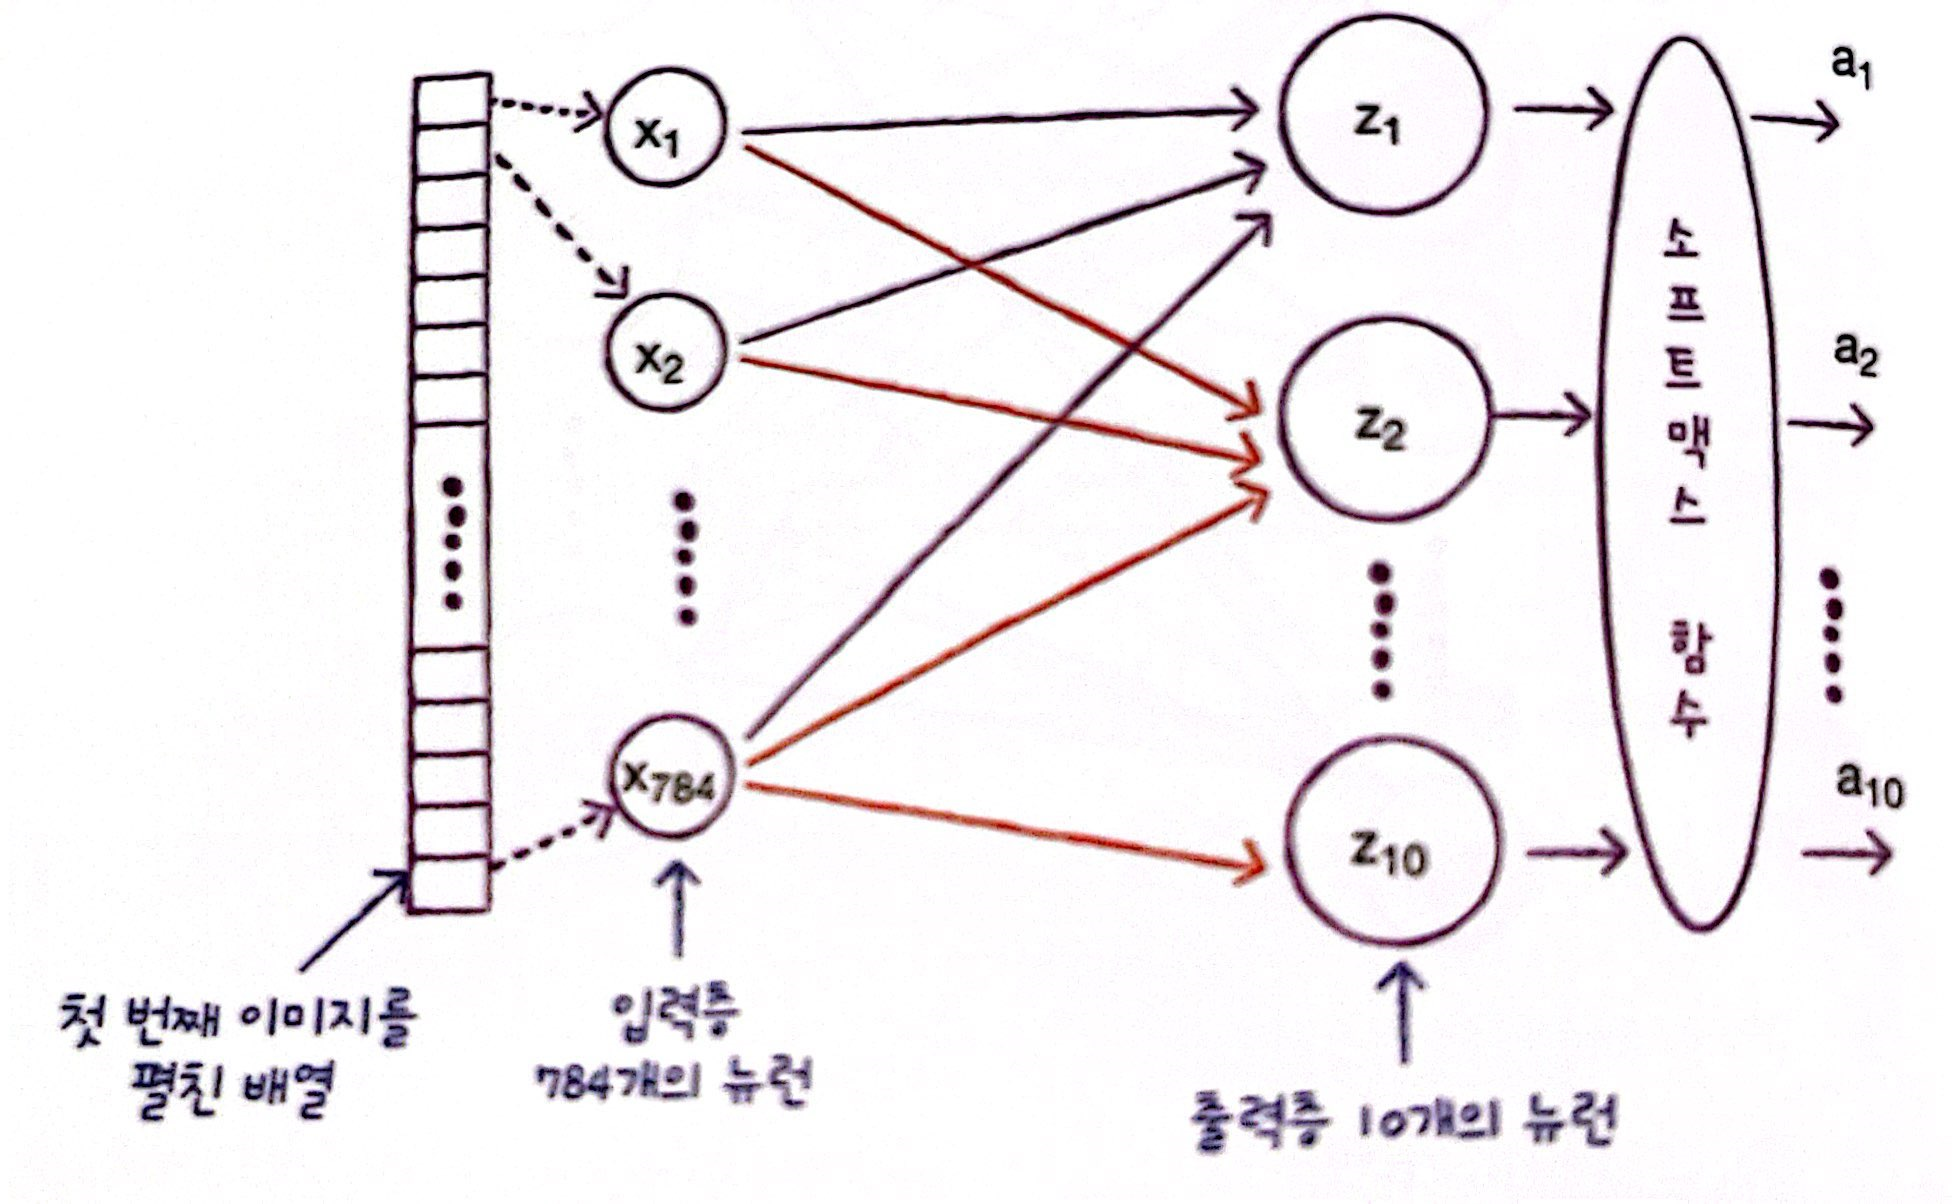

## 인공신경망으로 패션 아이템 분류하기

**케라스 모델 설정**

- compile(): 손실함수, 측정값 등을 설정

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

**손실(loss) 함수**

이진 분류: loss = 'binary_crossentropy', 양성 클래스에 대한 확률만 계산

다중 분류: loss ='categorical_crossentropy', 모든 클래스에 대한 확률을 계산

**sparse라는 단어는 왜 붙어 있는가?**

클래스 레이블이 정수이기 때문에 붙음

이를 이해하기 위해서 어떻게 다중분류에서 확률이 계산되는지 알아야 함

**이진분류**

이진 크로스 엔트로피 손실을 위해, -log(예측 확률)에 타깃값(정답)을 곱함

a를 예측 확률이라고 하면,

타깃값이 1 일때, -log(a) * 타깃값

타깃값이 0 일때, -log(1 - a) * (1 - 타깃값)


**다중분류**

출력층은 클래스 수 만큼의 뉴런이 있고, 클래스 수만큼의 클래스에 대한 확률을 출력함

클래스 수 만큼의 확률이 모두 출력되기 때문에 타깃에 해당하는 확률을 남기기 위해 나머지 확률에 모두 0을 곱함

예를 들어 샘플이 티셔츠일 경우 첫 번째 뉴런의 활성화 함수 출력인 a1에 크로스 엔트로피 함수를 적용하고 나머지 활성화 함수 출력 a2~a10까지는 모두 0으로 만듬

이렇게 하기 위해 티셔츠 샘플의 타깃값은 첫 번째 원소만 1이고 나머지는 모두 0인 배열로 만들 수 있음

[1,0,0,0,0,0,0,0,0,0]

즉, 타깃에 해당하는 위치만 1이고 나머지는 0이 되는 배열을 만들어야 함

이를 원-핫 인코딩이라고 함

다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면 0,1,2와 같이 정수로 된 타깃값을 원-핫 인코딩으로 변환해야함

그러나 패션 MNIST 데이터의 타깃값은 0~9사이의 정수값으로 되어있음

정수로된 타깃값을 이용해 크로스 엔트로피 손실을 계산하는 것이 바로sparse_categorical_crossentropy임

만약 타깃값을 원-핫 인코딩으로 변환해서 준비했다면 categorical_crossentropy를 사용하면 됨

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


**metrics**

추가로 측정하려는 지표를 지정할 수 있음

케라스는 모델이 훈련할 때 기본적으로 에포크마다 손실 값을 출력함

손실이 줄어드는 것을 보고 훈련이 잘 되었다는 것을 알 수 있지만 정확도를 함께 출력하면 더 좋음

이를 위해 metrics 매개변수에 정확도 지표를 의미하는 accuracy를 지정

**모델 훈련**

- fit() : 반복할 epochs 횟수 지정

In [ ]:
# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 9s 3ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4280 - accuracy: 0.8555


여기서 Epoch는 훈련 횟수이고 밑에 있는 1500은 미니배치의 수

48000개의 샘플을 한 번에 모두 사용하여 훈련하기에는 시간이 많이 걸리므로 32개씩 나누어서 총 1500번 훈련을 수행

즉, 이 예제에서는 총 1500*5번의 모델 매개변수 수정이 발생함

모델의 학습 속도를 높이고 계산량을 줄이면서도 전체 데이터셋에 대한 대표성을 유지할 수 있음

**모델 평가**

- evaluate(): 모델 성능 평가

In [ ]:
# 모델 성능 평가: 떼어냈던 검증 세트 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]